Q* Learning with FrozenLake 🕹️⛄
In this Notebook, we'll implement an agent that plays FrozenLake.Frozen Lake

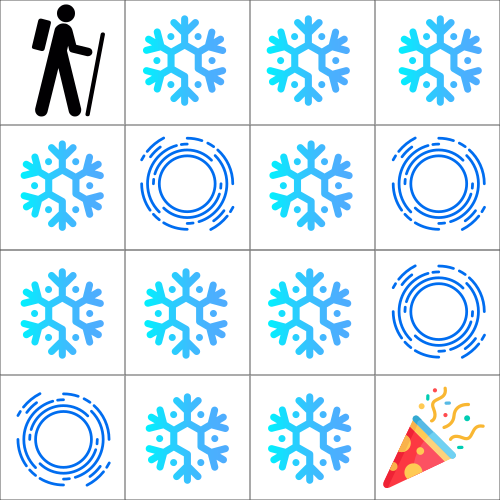

Step 1: Create the environment 🎮
Here we'll create the FrozenLake environment.
OpenAI Gym is a library composed of many environments that we can use to train our agents.
In our case we choose to use Frozen Lake.

In [1]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

In [2]:
print(np.__version__)

2.0.2


In [10]:
np.bool_

numpy.bool


Step 1: Create the environment 🎮
Here we'll create the FrozenLake environment.
OpenAI Gym is a library composed of many environments that we can use to train our agents.
In our case we choose to use Frozen Lake.

In [3]:
env = gym.make('FrozenLake-v1')

Step 2: Create the Q-table and initialize it 🗄️
Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
OpenAI Gym provides us a way to do that: env.action_space.n and env.observation_space.n

In [4]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Step 3: Create the hyperparameters ⚙️
Here, we'll specify the hyperparameters

In [6]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploaration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

Step 4: The Q learning algorithm 🧠
Now we implement the Q learning algorithm: Q algo

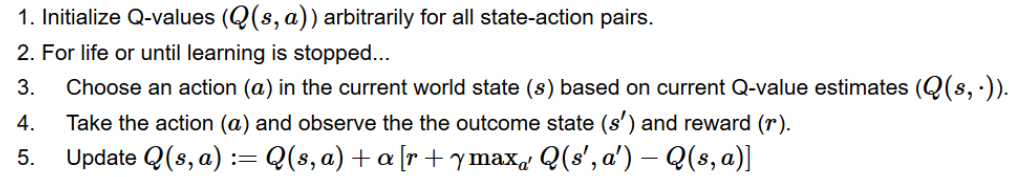

In [7]:
import numpy as np
rewards_all_episodes = []

#Q learning algorithm
for episode in range(num_episodes):
    state = env.reset()

    done = False
    rewards_current_episodes = 0

    for step in range(max_steps_per_episode):
        # exploaration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state])
        else:
            action = env.action_space.sample()

        new_state, reward, done, info = env.step(action)

        #Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + learning_rate * np.max(q_table[new_state]))
        
        state = new_state
        rewards_current_episodes += reward

        if done == True:
            break

    #Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploaration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

    rewards_all_episodes.append(rewards_current_episodes)

#calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
print("***** Average reward per thousand episodes*****\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

#print updated Q-table
print("\n\n***** Q-table *****\n")
print(q_table)


        



AttributeError: module 'numpy' has no attribute 'bool8'

error: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/

bool8 is a new data type introduced in NumPy version 1.20

In [4]:
n_states = env.observation_space.n
n_actions = env.action_space.n

print(n_states)
print(n_actions)

16
4


In [5]:
V = np.zeros(n_states)
returns = {}

n_episodes = 1000
max_steps = 50

In [6]:
episode = []
state = env.reset()
for j in range(max_steps):
    env.render()
    action = env.action_space.sample() #choose the random action
    next_state, reward, done, info = env.step(action)
    episode.append((state, action, reward))
    state = next_state
    if done:
        break

d:\a27_YEARS_OLD\rainforcement_learning\venv\Lib\site-packages\gym\envs\toy_text\frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


AttributeError: module 'numpy' has no attribute 'bool8'

In [1]:
import numpy as np
import copy
class GridWorld:
    def __init__(self):
        # S O O O
        # O O O *
        # O * O O
        # O * 0 T
        self.qTable = None
        self.actionSpace = ('U', 'D', 'L', 'R')
        self.actions = {
            (0, 0): ('D', 'R'),
            (0, 1): ('L', 'D', 'R'),
            (0, 2): ('L', 'D', 'R'),
            (0, 3): ('L', 'D'),
            (1, 0): ('U', 'D', 'R'),
            (1, 1): ('U', 'L', 'D', 'R'),
            (1, 2): ('U', 'L', 'D', 'R'),
            (1, 3): ('U', 'L', 'D'),
            (2, 0): ('U', 'D', 'R'),
            (2, 1): ('U', 'L', 'D', 'R'),
            (2, 2): ('U', 'L', 'D', 'R'),
            (2, 3): ('U', 'L', 'D'),
            (3, 0): ('U', 'R'),
            (3, 1): ('U', 'L', 'R'),
            (3, 2): ('U', 'L', 'R')
        }
        # state action pair
        #  A dictionary where keys are possible states (coordinates (row, column)) and 
        # values are tuples of allowed actions from that state. This implicitly defines the non-terminal states 
        # the grid structure, including obstacles (states not in self.actions).

        self.rewards = {(3, 3): 0.03, (1, 3): -0.01, (2, 1):-0.011, (3, 1):-0.01}
        self.explored = 0
        self.exploited = 0
        self.initialQtable()

    def initialQtable(self):
      self.qTable = {}
      for state in self.actions:
          self.qTable[state]={}
          for move in self.actions[state]:
              self.qTable[state][move]=0
      print(self.qTable)  

    # Creates the self.qTable as a nested dictionary.
    # For each state in self.actions, it creates an inner dictionary.
    # For each move allowed from that state, it initializes the Q-value to 0.
    # Prints the initial Q-table.

    def updateQtable(self, newQ,updateRate=0.05):
        for state in self.qTable:
            for action in self.qTable[state]:
                self.qTable[state][action] = self.qTable[state][action]+(updateRate*(newQ[state][action]-self.qTable[state][action]))
      
#     Updates the current self.qTable using a simple learning rule.
#     For each state and ``actionin theself.qTable, it updates the Q-value by taking a step (updateRate) 
# towards the corresponding value in thenewQ` table. This is a form of incremental update.
    
    def getRandomPolicy(self):
        policy = {}
        for state in self.actions:
            policy[state] = np.random.choice(self.actions[state])
        return policy
    # Creates a random policy where for each state, a random allowed action is chosen.


    def reset(self):
        return (0, 0)
        
    def is_terminal(self, s):
        return s not in self.actions
    
    # Checks if a given state s is a terminal state. A state is considered terminal if it's not present as a key in 
    # the self.actions dictionary (meaning no further actions are defined from it).


    def getNewState(self,state,action):
      i, j = zip(state)
      row = int(i[0])   # start row and column
      column = int(j[0])
      if action == 'U':
          row -= 1
      elif action == 'D':
          row += 1
      elif action == 'L':
          column -= 1
      elif action == 'R':
          column += 1
      return row,column

    # Given a state (row, column) and an action ('U', 'D', 'L', 'R'), it calculates and returns the new state 
    # coordinates.



    def chooseAction(self, state, policy, exploreRate):
        if exploreRate > np.random.rand():
            self.explored += 1
            return np.random.choice(self.actions[state])
        self.exploited += 1
        return policy[state]
    
#         Implements an epsilon-greedy exploration strategy.
# With a probability of exploreRate, it chooses a random action from the allowed actions for the current state (exploration).
# Otherwise (with probability 1 - exploreRate), it chooses the action dictated by the current policy for the current state (exploitation).
# It increments the self.explored or self.exploited counter accordingly.

    def move(self, state, policy, exploreRate):
        action = self.chooseAction(state, policy, exploreRate)
        row,column=self.getNewState(state,action)
        if (row, column) in self.rewards:
            return action,(row, column),self.rewards[(row, column)]
        return action,(row, column), 0

        # Chooses an action using self.chooseAction.
        # Determines the nextState using self.getNewState.
        # Checks if the nextState has an associated reward in self.rewards. If so, it returns the action, 
        # nextState, and the reward. Otherwise, the reward is 0.


    def printPolicy(self, policy):
        line = ""
        counter = 0
        for item in policy:
            line += f" | {policy[item]} | "
            counter += 1
            if counter > 3:
                print(line)
                print("----------------------------")
                counter = 0
                line = ""
        print(line)
        print("----------------------------")
        



In [2]:
enviroment = GridWorld()
policy = enviroment.getRandomPolicy()
enviroment.printPolicy(policy)

{(0, 0): {'D': 0, 'R': 0}, (0, 1): {'L': 0, 'D': 0, 'R': 0}, (0, 2): {'L': 0, 'D': 0, 'R': 0}, (0, 3): {'L': 0, 'D': 0}, (1, 0): {'U': 0, 'D': 0, 'R': 0}, (1, 1): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (1, 2): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (1, 3): {'U': 0, 'L': 0, 'D': 0}, (2, 0): {'U': 0, 'D': 0, 'R': 0}, (2, 1): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (2, 2): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (2, 3): {'U': 0, 'L': 0, 'D': 0}, (3, 0): {'U': 0, 'R': 0}, (3, 1): {'U': 0, 'L': 0, 'R': 0}, (3, 2): {'U': 0, 'L': 0, 'R': 0}}
 | R |  | L |  | L |  | L | 
----------------------------
 | R |  | R |  | R |  | U | 
----------------------------
 | U |  | U |  | D |  | L | 
----------------------------
 | R |  | R |  | L | 
----------------------------


In [2]:
class GridWorld:
    def __init__(self):
        self.Q = None
        self.actionSpace = ('U', 'D', 'L', 'R')
        self.actions = {(i,j): ('U' if i> 0 else '', 'D' if i<3 else '', 'L' if j>0 else '', 'R' if j<3 else '') for i in range(4) for j in range(4)}
        self.rewards = {(3,3): 0.03, (1,3): -0.01, (2,1):-0.011,(3,1):-0.01}
        self.explored = 0
        self.exploited = 0
        self.initialQ()

    def initialQ(self):
        self.Q = {}
        for state in self.actions:
            self.Q[state] = {}
            for move in self.actions[state]:
                self.Q[state][move] = 0
        print(self.Q)

    def updateQ(self, new_val_q, update_val = 0.05):
        for state in self.Q:
            for action in self.Q[state]:
                self.Q[state][action] = self.Q[state][action]+(update_val* (new_val_q[state][action]-self.Q[state][action]))
    def random_policy(self):
        policy = {}
        for state in self.actions:
            policy[state] = np.random.choice(self.actions[state])
            return policy
    def reset(self):
        return (0,0)
    def terminal(self, s):
        return s not in self.actions
    def new_state(self, state, action):
        i, j = zip(state)
        row = int(i[0])
        column = int(j[0])
        if action == 'U':
            row -= 1
        elif action == 'D':
            row += 1
        elif action == 'L':
            column -= 1
        elif action == 'R':
            column += 1
        return row,column


    def choose_action(self, state, policy, explore_rate):
        if explore_rate > np.random.rand():
            self.explored += 1
            return np.random.choice(self.actions[state])
        self.exploited += 1
        return policy[state]

    def move(self, state, policy, explore_rate):
        action = self.choose_action(state, policy, explore_rate)
        row, column = self.new_state(state, action)
        if(row, column) in self.rewards:
            return action, (row, column), self.rewards[(row, column)]
        return action, (row, column), 0

    def print_policy(self, policy):
        line = ""
        counter = 0
        for item in policy:
            line += f" | {policy[item]} | "
            counter += 1
            if counter > 3:
                print(line)
                print("----------------------------")
                counter = 0
                line = ""
        print(line)
        print("----------------------------")
        
env = GridWorld()
policy = env.random_policy()
env.print_policy(policy)
for i in range(21):
    estimated_q = copy.deepcopy(env.Q)
    for state in estimated_q:
        for action in estimated_q[state]:
            estimated_q[state][action] = 0
    collectedSample = 0
    for j in range(20):
        trajectory = []
        state = env.reset()
        step_count = 0
        
        while(not env.terminal(state)) and (step_count<30):
            action, new_state, reward = env.move(state, policy, explore_rate=0.05)
            trajectory.append(((state, action), reward))
            state = new_state
            step_count += 1
        collectedSample += 1
        rewards = 0
        for item in reversed(trajectory):
            q, reward = zip(item)
            rewards += 0.9 * (reward[0])
            estimated_q[q[0][0]][q[0][1]] = estimated_q[q[0][0]][q[0][1]] + ((1 / collectedSample) * (rewards - estimated_q[q[0][0]][q[0][1]]))
        env.updateQ(estimated_q)
        for state in policy:
            policy[state] = max(env.Q[state], key=env.Q[state].get)
    if (i%100)==0:
        print(f"\n\n\n step:{i}")
        # enviroment.printVaues(values)
        env.print_policy(policy)
            
print(env.exploited, env.explored)

{(0, 0): {'': 0, 'D': 0, 'R': 0}, (0, 1): {'': 0, 'D': 0, 'L': 0, 'R': 0}, (0, 2): {'': 0, 'D': 0, 'L': 0, 'R': 0}, (0, 3): {'': 0, 'D': 0, 'L': 0}, (1, 0): {'U': 0, 'D': 0, '': 0, 'R': 0}, (1, 1): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (1, 2): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (1, 3): {'U': 0, 'D': 0, 'L': 0, '': 0}, (2, 0): {'U': 0, 'D': 0, '': 0, 'R': 0}, (2, 1): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (2, 2): {'U': 0, 'D': 0, 'L': 0, 'R': 0}, (2, 3): {'U': 0, 'D': 0, 'L': 0, '': 0}, (3, 0): {'U': 0, '': 0, 'R': 0}, (3, 1): {'U': 0, '': 0, 'L': 0, 'R': 0}, (3, 2): {'U': 0, '': 0, 'L': 0, 'R': 0}, (3, 3): {'U': 0, '': 0, 'L': 0}}
 |  | 
----------------------------


KeyError: (1, 0)